Es un análisis de los datos obtenidos por Transparencia y publicados por https://twitter.com/alejandramatus

Parte de este análisis está inspirado en el twit de https://twitter.com/perez en https://twitter.com/perez/status/1261143558742061062


In [21]:
import pandas as pd
# Lo primero que vamos a hacer es importar ambos datasets.
# 1.- Data sets de muertes por enfermedades respiratorias entre el 03 de Marzo y el 29 de Abril del 2020.
mresp=pd.read_excel('Anexo_Respuesta_AK002T0009097_vhd.xlsx')

In [22]:
# Veamos la forma que tiene:
mresp

,FECHA INSC DEF,FECHA DEF,EDAD,REGION,COMUNA,OFICINA INS DEF,LUGAR DEF
0,20200310,20200309,70,7,TALCA,TALCA,HOSPITAL REGIONAL DE TALCA
1,20200310,20200309,88,8,TALCAHUANO,PRESIDENTE RÍOS,HOSPITAL LAS HIGUERAS
2,20200310,20200309,65,13,SAN BERNARDO,SAN BERNARDO,HOSPITAL EL PINO
3,20200310,20200308,61,10,PUERTO MONTT,PUERTO MONTT,HOSPITAL DE PUERTO MONTT
4,20200310,20200309,83,2,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA
...,...,...,...,...,...,...,...
4196,20200429,20200428,84,13,PUENTE ALTO,PUENTE ALTO,HOSPITAL DR. SOTERO DEL RIO
4197,20200429,20200428,66,9,TEMUCO,TEMUCO,Hospital Clínico Universidad Mayor
4198,20200429,20200427,14,9,PADRE LAS CASAS,PADRE LAS CASAS,PADRE LAS CASAS
4199,20200429,20200428,76,10,PURRANQUE,PURRANQUE,PURRANQUE


In [23]:
# Lo primero que nos damos cuenta es que tenemos que cambiar el formato de las fechas por uno más maleable.
mresp['FECHA DEF']=pd.to_datetime(mresp['FECHA DEF'],format='%Y%m%d')
mresp['FECHA INSC DEF']=pd.to_datetime(mresp['FECHA INSC DEF'],format='%Y%m%d')
# También le vamos a cambiar el nombre a las columnas porque no nos gustan los espacios
mresp=mresp.rename(columns={'FECHA INSC DEF':'FECHA_INSC',
                     'FECHA DEF':'FECHA_DEF',
                     'OFICINA INS DEF':'OFICINA',
                     'LUGAR DEF':'LUGAR_DEF'})

In [44]:
# También las vamos a ordenar por fecha de defunción
mresp=mresp.sort_values(by='FECHA_DEF')
mresp.head()

,FECHA_INSC,FECHA_DEF,EDAD,REGION,COMUNA,OFICINA,LUGAR_DEF
365,2020-03-04,2020-03-03,99,4,LA SERENA,LA SERENA,LA SERENA
645,2020-03-05,2020-03-03,0,13,LA FLORIDA,LA FLORIDA,Hospital Clínico Metropolitano La Florida Dra....
132,2020-03-04,2020-03-03,94,10,PUERTO MONTT,PUERTO MONTT,PUERTO MONTT
588,2020-03-03,2020-03-03,87,8,LOS ANGELES,LOS ÁNGELES,HOSPITAL VICTOR RIOS RUIZ
835,2020-03-03,2020-03-03,67,5,QUILLOTA,QUILLOTA,QUILLOTA


In [43]:
# Notamos que hay datos de Enero (sólo 2) y Febrero.... Como la solucitud a Transparencia es desde el 03 de Marzo
# Tengo mis dudas y prefiero no trabajar con datos anteriores a 03 de Marzo
mresp=mresp[mresp.FECHA_DEF>=pd.to_datetime('2020-03-03', format='%Y-%m-%d')]
mresp.head()

,FECHA_INSC,FECHA_DEF,EDAD,REGION,COMUNA,OFICINA,LUGAR_DEF
365,2020-03-04,2020-03-03,99,4,LA SERENA,LA SERENA,LA SERENA
535,2020-03-05,2020-03-03,41,13,INDEPENDENCIA,INDEPENDENCIA,INDEPENDENCIA
230,2020-03-04,2020-03-03,85,6,RANCAGUA,RANCAGUA,RANCAGUA
232,2020-03-04,2020-03-03,77,13,PUENTE ALTO,PUENTE ALTO,HOSPITAL DR. SOTERO DEL RIO
844,2020-03-05,2020-03-03,80,13,INDEPENDENCIA,INDEPENDENCIA,Clinica Ensenada


In [53]:
mresp.tail()

,FECHA_INSC,FECHA_DEF,EDAD,REGION,COMUNA,OFICINA,LUGAR_DEF
4047,2020-04-29,2020-04-29,90,6,QUINTA DE TILCOCO,QUINTA DE TILCOCO,QUINTA DE TILCOCO
4013,2020-04-29,2020-04-29,75,13,HUECHURABA,HUECHURABA,HUECHURABA
4035,2020-04-29,2020-04-29,82,5,SAN ANTONIO,SAN ANTONIO,HOSPITAL CLAUDIO VICUNA
4012,2020-04-29,2020-04-29,83,13,MAIPÚ,MAIPÚ,Hospital El Carmen
4164,2020-04-29,2020-04-29,94,2,ANTOFAGASTA,ANTOFAGASTA,ANTOFAGASTA


In [80]:

# Con una primera aproximación, veamos si la tendencia nacional va en aumento.
mresp_chile=mresp.groupby('FECHA_DEF').size().reset_index(name='TOTAL_DEF')
mresp_chile.head()


,FECHA_DEF,TOTAL_DEF
0,2020-03-03,64
1,2020-03-04,61
2,2020-03-05,77
3,2020-03-06,63
4,2020-03-07,53


In [65]:
mresp_chile.tail()

,FECHA_DEF,TOTAL_DEF
53,2020-04-25,86
54,2020-04-26,64
55,2020-04-27,77
56,2020-04-28,57
57,2020-04-29,10


[(0, 100)]

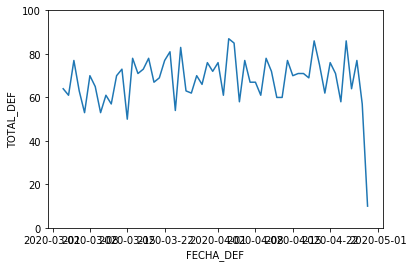

In [112]:
import seaborn as sns
g=sns.lineplot(x="FECHA_DEF", y="TOTAL_DEF",
             data=mresp_chile)
g.set(ylim=(0, 100))


<Figure size 432x288 with 0 Axes>

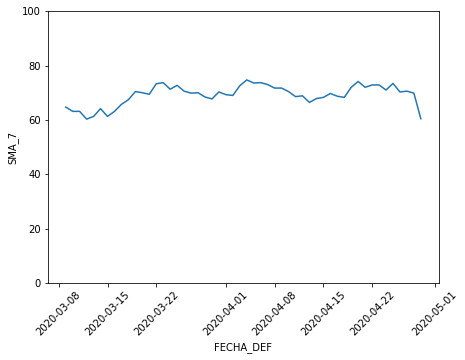

In [139]:
#No parece haber un aumento, voy a tomar el promedio móvil de 7 días 
mresp_chile['SMA_7']=mresp_chile.TOTAL_DEF.rolling(window=7).mean()
import matplotlib.pyplot as plt
alto=5
ancho=7
fig = plt.figure();
fig, ax = plt.subplots(figsize=(ancho, alto));
g=sns.lineplot(x="FECHA_DEF", y="SMA_7",
             data=mresp_chile,ax=ax);

g.set(ylim=(0, 100));
#g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.xticks( rotation=45);
# Definitivamente no hay aumento a nivel nacional......... 

[(0, 40)]

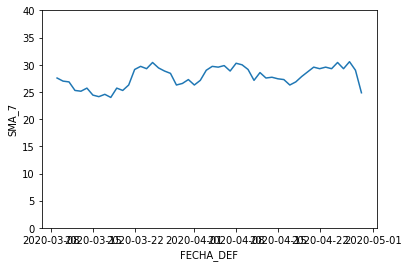

In [120]:
# Y si tomamos cada región en función de su población?




mresp_RM=mresp[mresp.REGION==13].groupby('FECHA_DEF').size().reset_index(name='TOTAL_DEF')
mresp_RM['SMA_7']=mresp_RM.TOTAL_DEF.rolling(window=7).mean()
g=sns.lineplot(x="FECHA_DEF", y="SMA_7",
             data=mresp_RM)

g.set(ylim=(0, 40))




In [225]:
mrespREG=mresp.groupby(['FECHA_DEF','REGION']).size().reset_index(name='TOTAL_DEF')

#los datos de población por región los saco de https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto7/PCR.csv
pobla=pd.read_csv('POBLACION_REGION.CSV')
pobla=pobla[['Codigo region','Poblacion']]
pobla=pobla.rename(columns={'Codigo region':'REGION'})
mrespREG=mrespREG.merge(pobla, on='REGION')
mrespREG['DEF_POBLA']=mrespREG.TOTAL_DEF/mrespREG.Poblacion
mrespREG['DEF_POBLA_SMA_7']=mrespREG.DEF_POBLA.rolling(window=7).mean()
mrespREG['SMA_7']=mrespREG.TOTAL_DEF.rolling(window=7).mean()

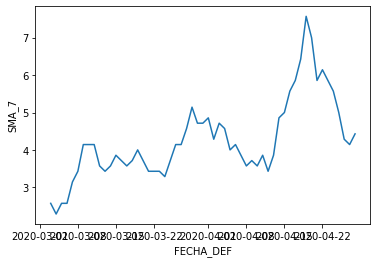

In [251]:
sns.lineplot(x="FECHA_DEF", y="SMA_7",
             data=mrespREG[mrespREG.REGION==7])

In [228]:
mrespREG['SMA_7']=mrespREG.TOTAL_DEF.rolling(window=7).mean()
mrespREG[mrespREG.REGION==1]

,FECHA_DEF,REGION,TOTAL_DEF,Poblacion,DEF_POBLA,DEF_POBLA_SMA_7,SMA_7
655,2020-03-05,1,4,382773,0.000010,0.000005,1.714286
656,2020-03-06,1,1,382773,0.000003,0.000005,1.714286
657,2020-03-07,1,1,382773,0.000003,0.000005,1.714286
658,2020-03-08,1,3,382773,0.000008,0.000006,2.000000
659,2020-03-10,1,1,382773,0.000003,0.000005,1.857143
660,2020-03-11,1,2,382773,0.000005,0.000005,1.857143
661,2020-03-13,1,2,382773,0.000005,0.000005,2.000000
662,2020-03-14,1,1,382773,0.000003,0.000004,1.571429
663,2020-03-15,1,1,382773,0.000003,0.000004,1.571429
664,2020-03-16,1,4,382773,0.000010,0.000005,2.000000


In [220]:
mresp.groupby(['FECHA_DEF','REGION']).size().reset_index(name='TOTAL_DEF')

,FECHA_DEF,REGION,TOTAL_DEF
0,2020-03-03,2,2
1,2020-03-03,4,3
2,2020-03-03,5,13
3,2020-03-03,6,2
4,2020-03-03,7,2
...,...,...,...
733,2020-04-29,6,1
734,2020-04-29,10,1
735,2020-04-29,13,2
736,2020-04-29,14,1
